[View in Colaboratory](https://colab.research.google.com/github/samarth1818/UnderstandingFaceID/blob/master/UnderstandingFaceID.ipynb)

# **Download Dataset**

In [1]:
!ls

datalab  sample_data


In [0]:
!mkdir faceid_train
!mkdir faceid_val

In [3]:
!pip install -U keras
import keras

    100% |████████████████████████████████| 307kB 4.4MB/s 
    100% |████████████████████████████████| 51kB 7.9MB/s 
  Found existing installation: Keras 2.1.6
    Uninstalling Keras-2.1.6:
      Successfully uninstalled Keras-2.1.6


Using TensorFlow backend.


In [0]:
link_list=["http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-16)(151751).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-16)(153054).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-16)(154211).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-16)(160440).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-16)(160931).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-16)(161342).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-16)(163349).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-16)(164248).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-17)(141550).zip", \
          "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-17)(142154).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-17)(142457).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-17)(143016).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-18)(132824).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-18)(133201).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-18)(133846).zip", \
          "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-18)(134239).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-18)(134757).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-18)(140516).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-18)(143345).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-18)(144316).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-18)(145150).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-18)(145623).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-18)(150303).zip", \
          "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-18)(150650).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-18)(151337).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-18)(151650).zip"]
val_list=["http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-18)(152717).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-18)(153532).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-18)(154129).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-18)(154728).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-18)(155357).zip"]

In [0]:
import requests, zipfile, io
for link in link_list:
  r = requests.get(link, stream=True)
  z = zipfile.ZipFile(io.BytesIO(r.content))
  z.extractall("faceid_train")

for link in val_list:
  r = requests.get(link, stream=True)
  z = zipfile.ZipFile(io.BytesIO(r.content))
  z.extractall("faceid_val")

# **Input Preprocessing**

In [0]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from PIL import Image

In [0]:
def create_couple(filepath):
  folder = np.random.choice(glob.glob(filepath + "*"))
  while folder == "datalab":
    folder = np.random.choice(glob.glob(filepath + "*"))
  print(folder)
  mat = np.zeros((480, 640), dtype='float32')
  i=0
  j=0
  depth_file = np.random.choice(glob.glob(folder + "/*.dat"))
  with open(depth_file) as file:
    for line in file:
      vals = line.split('\t')
      for val in vals:
        if val == '\n': continue
        if int(val) > 1200 or int(val) == -1: val = 1200
        mat[i][j] = float(int(val))
        j+=1
        j=j%640
      i+=1
    mat = np.asarray(mat)
    mat_small = mat[140:340, 220:420]
    mat_small = (mat_small-np.mean(mat_small))/np.max(mat_small)
    plt.imshow(mat_small)
    plt.show()
    
    mat2=np.zeros((480,640), dtype='float32')
    i=0
    j=0
    depth_file = np.random.choice(glob.glob(folder + "/*.dat"))
    with open(depth_file) as file:
        for line in file:
            vals = line.split('\t')
            for val in vals:
                if val == "\n": continue 
                if int(val) > 1200 or int(val) == -1: val= 1200
                mat2[i][j]=float(int(val))
                j+=1
                j=j%640

            i+=1
        mat2 = np.asarray(mat2)
    mat2_small=mat2[140:340,220:420]
    mat2_small=(mat2_small-np.mean(mat2_small))/np.max(mat2_small)
    plt.imshow(mat2_small)
    plt.show()
    return np.array([mat_small, mat2_small])    

faceid_train/(2012-05-16)(154211)


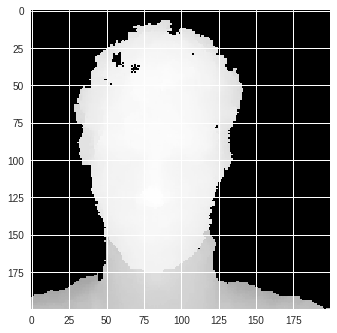

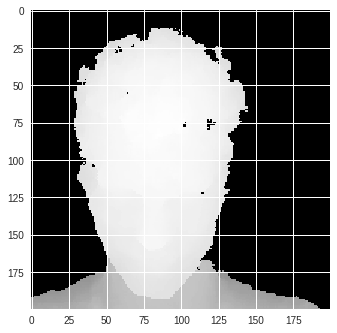

[[[ 0.12349395  0.12349395  0.12349395 ...  0.12349395  0.12349395
    0.12349395]
  [ 0.12349395  0.12349395  0.12349395 ...  0.12349395  0.12349395
    0.12349395]
  [ 0.12349395  0.12349395  0.12349395 ...  0.12349395  0.12349395
    0.12349395]
  ...
  [-0.07733937 -0.07733937 -0.07733937 ...  0.12349395  0.12349395
    0.12349395]
  [-0.08150604 -0.07900605 -0.07900605 ...  0.12349395  0.12349395
    0.12349395]
  [-0.08317271 -0.08317271 -0.08317271 ... -0.08567271 -0.08567271
   -0.08567271]]

 [[ 0.13294047  0.13294047  0.13294047 ...  0.13294047  0.13294047
    0.13294047]
  [ 0.13294047  0.13294047  0.13294047 ...  0.13294047  0.13294047
    0.13294047]
  [ 0.13294047  0.13294047  0.13294047 ...  0.13294047  0.13294047
    0.13294047]
  ...
  [-0.0587262  -0.0587262  -0.06039286 ...  0.13294047  0.13294047
    0.13294047]
  [-0.06039286 -0.06289286 -0.06289286 ...  0.13294047  0.13294047
    0.13294047]
  [-0.06539286 -0.06539286 -0.06539286 ...  0.13294047  0.13294047
    0.

In [13]:
print(create_couple("faceid_train/"))

In [0]:
def create_couple_rgbd(file_path):
  folder=np.random.choice(glob.glob(file_path + "*"))
  while folder == "datalab":
    folder=np.random.choice(glob.glob(file_path + "*"))
  print(folder)
  mat=np.zeros((480,640), dtype='float32')
  i=0
  j=0
  depth_file = np.random.choice(glob.glob(folder + "/*.dat"))
  with open(depth_file) as file:
      for line in file:
          vals = line.split('\t')
          for val in vals:
              if val == "\n": continue    
              if int(val) > 1200 or int(val) == -1: val= 1200
              mat[i][j]=float(int(val))
              j+=1
              j=j%640

          i+=1
      mat = np.asarray(mat)
  mat_small=mat[140:340,220:420]
  img = Image.open(depth_file[:-5] + "c.bmp")
  img.thumbnail((640,480))
  img = np.asarray(img)
  img = img[140:340,220:420]
  mat_small=(mat_small-np.mean(mat_small))/np.max(mat_small)
  plt.imshow(mat_small)
  plt.show()
  plt.imshow(img)
  plt.show()


  mat2=np.zeros((480,640), dtype='float32')
  i=0
  j=0
  depth_file = np.random.choice(glob.glob(folder + "/*.dat"))
  with open(depth_file) as file:
      for line in file:
          vals = line.split('\t')
          for val in vals:
              if val == "\n": continue
              if int(val) > 1200 or int(val) == -1: val= 1200
              mat2[i][j]=float(int(val))
              j+=1
              j=j%640

          i+=1
      mat2 = np.asarray(mat2)
  mat2_small=mat2[140:340,220:420]
  img2 = Image.open(depth_file[:-5] + "c.bmp")
  img2.thumbnail((640,480))
  img2 = np.asarray(img2)
  img2 = img2[160:360,240:440]

  plt.imshow(img2)
  plt.show()
  mat2_small=(mat2_small-np.mean(mat2_small))/np.max(mat2_small)
  plt.imshow(mat2_small)
  plt.show()

  full1 = np.zeros((200,200,4))
  full1[:,:,:3] = img[:,:,:3]
  full1[:,:,3] = mat_small

  full2 = np.zeros((200,200,4))
  full2[:,:,:3] = img2[:,:,:3]
  full2[:,:,3] = mat2_small
  return np.array([full1, full2])

faceid_val/(2012-05-18)(154129)


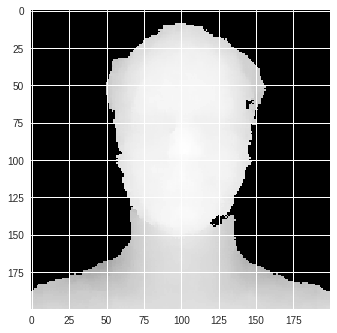

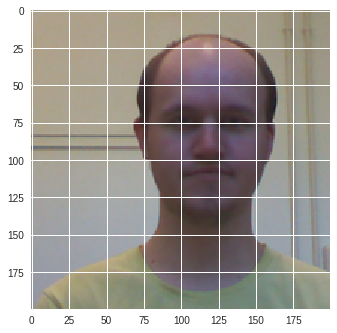

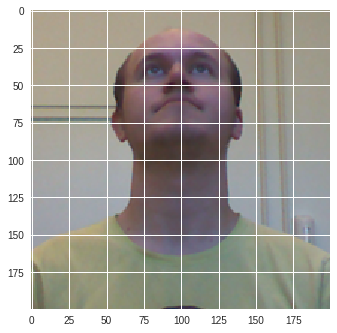

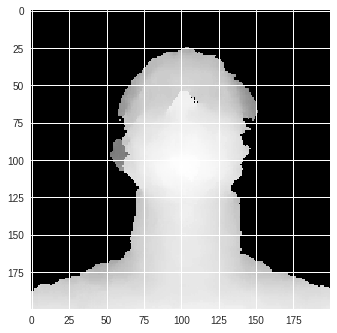

array([[[[ 1.76000000e+02,  1.63000000e+02,  1.38000000e+02,
           9.76551324e-02],
         [ 1.76000000e+02,  1.62000000e+02,  1.39000000e+02,
           9.76551324e-02],
         [ 1.73000000e+02,  1.63000000e+02,  1.42000000e+02,
           9.76551324e-02],
         ...,
         [ 1.53000000e+02,  1.49000000e+02,  1.27000000e+02,
           9.76551324e-02],
         [ 1.54000000e+02,  1.48000000e+02,  1.26000000e+02,
           9.76551324e-02],
         [ 1.57000000e+02,  1.46000000e+02,  1.27000000e+02,
           9.76551324e-02]],

        [[ 1.76000000e+02,  1.63000000e+02,  1.40000000e+02,
           9.76551324e-02],
         [ 1.75000000e+02,  1.63000000e+02,  1.40000000e+02,
           9.76551324e-02],
         [ 1.73000000e+02,  1.63000000e+02,  1.40000000e+02,
           9.76551324e-02],
         ...,
         [ 1.53000000e+02,  1.49000000e+02,  1.29000000e+02,
           9.76551324e-02],
         [ 1.54000000e+02,  1.48000000e+02,  1.26000000e+02,
           9.765513

In [17]:
create_couple_rgbd("faceid_val/")

In [0]:
def create_wrong(file_path):
    folder=np.random.choice(glob.glob(file_path + "*"))
    while folder == "datalab":
      folder=np.random.choice(glob.glob(file_path + "*"))    
    mat=np.zeros((480,640), dtype='float32')
    i=0
    j=0
    depth_file = np.random.choice(glob.glob(folder + "/*.dat"))
    with open(depth_file) as file:
        for line in file:
            vals = line.split('\t')
            for val in vals:
                if val == "\n": continue 
                if int(val) > 1200 or int(val) == -1: val= 1200
                mat[i][j]=float(int(val))
                j+=1
                j=j%640

            i+=1
        mat = np.asarray(mat)
    mat_small=mat[140:340,220:420]
    mat_small=(mat_small-np.mean(mat_small))/np.max(mat_small)
    plt.imshow(mat_small)
    plt.show()
    
    folder2=np.random.choice(glob.glob(file_path + "*"))
    while folder==folder2 or folder2=="datalab": #it activates if it chose the same folder
        folder2=np.random.choice(glob.glob(file_path + "*"))
    mat2=np.zeros((480,640), dtype='float32')
    i=0
    j=0
    depth_file = np.random.choice(glob.glob(folder2 + "/*.dat"))
    with open(depth_file) as file:
        for line in file:
            vals = line.split('\t')
            for val in vals:
                if val == "\n": continue
                if int(val) > 1200 or int(val) == -1: val= 1200
                mat2[i][j]=float(int(val))
                j+=1
                j=j%640

            i+=1
        mat2 = np.asarray(mat2)
    mat2_small=mat2[140:340,220:420]
    mat2_small=(mat2_small-np.mean(mat2_small))/np.max(mat2_small)
    plt.imshow(mat2_small)
    plt.show()
  
    
    return np.array([mat_small, mat2_small])

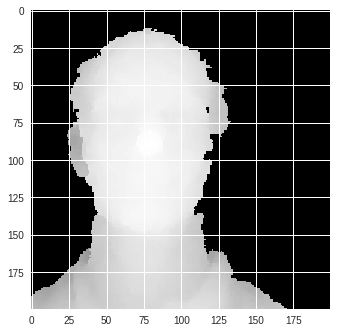

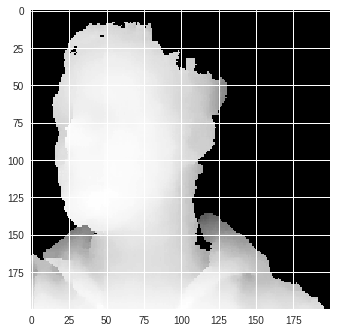

array([[[ 0.09373017,  0.09373017,  0.09373017, ...,  0.09373017,
          0.09373017,  0.09373017],
        [ 0.09373017,  0.09373017,  0.09373017, ...,  0.09373017,
          0.09373017,  0.09373017],
        [ 0.09373017,  0.09373017,  0.09373017, ...,  0.09373017,
          0.09373017,  0.09373017],
        ...,
        [-0.07210317, -0.07210317, -0.07210317, ...,  0.09373017,
          0.09373017,  0.09373017],
        [-0.07460317, -0.07460317, -0.07460317, ...,  0.09373017,
          0.09373017,  0.09373017],
        [-0.07460317, -0.07460317, -0.07460317, ...,  0.09373017,
          0.09373017,  0.09373017]],

       [[ 0.09056518,  0.09056518,  0.09056518, ...,  0.09056518,
          0.09056518,  0.09056518],
        [ 0.09056518,  0.09056518,  0.09056518, ...,  0.09056518,
          0.09056518,  0.09056518],
        [ 0.09056518,  0.09056518,  0.09056518, ...,  0.09056518,
          0.09056518,  0.09056518],
        ...,
        [-0.08026814, -0.08026814, -0.10526815, ...,  

In [19]:
create_wrong("faceid_train/")

In [0]:
def create_wrong_rgbd(file_path):
    folder=np.random.choice(glob.glob(file_path + "*"))
    while folder == "datalab":
      folder=np.random.choice(glob.glob(file_path + "*"))    
    mat=np.zeros((480,640), dtype='float32')
    i=0
    j=0
    depth_file = np.random.choice(glob.glob(folder + "/*.dat"))
    with open(depth_file) as file:
        for line in file:
            vals = line.split('\t')
            for val in vals:
                if val == "\n": continue
                if int(val) > 1200 or int(val) == -1: val= 1200
                mat[i][j]=float(int(val))
                j+=1
                j=j%640

            i+=1
        mat = np.asarray(mat)
    mat_small=mat[140:340,220:420]
    img = Image.open(depth_file[:-5] + "c.bmp")
    img.thumbnail((640,480))
    img = np.asarray(img)
    img = img[140:340,220:420]
    mat_small=(mat_small-np.mean(mat_small))/np.max(mat_small)
    plt.imshow(img)
    plt.show()
    plt.imshow(mat_small)
    plt.show()
    folder2=np.random.choice(glob.glob(file_path + "*"))
    while folder==folder2 or folder2=="datalab": #it activates if it chose the same folder
        folder2=np.random.choice(glob.glob(file_path + "*"))
    mat2=np.zeros((480,640), dtype='float32')
    i=0
    j=0
    depth_file = np.random.choice(glob.glob(folder2 + "/*.dat"))
    with open(depth_file) as file:
        for line in file:
            vals = line.split('\t')
            for val in vals:
                if val == "\n": continue 
                if int(val) > 1200 or int(val) == -1: val= 1200
                mat2[i][j]=float(int(val))
                j+=1
                j=j%640

            i+=1
        mat2 = np.asarray(mat2)
    mat2_small=mat2[140:340,220:420]
    img2 = Image.open(depth_file[:-5] + "c.bmp")
    img2.thumbnail((640,480))
    img2 = np.asarray(img2)
    img2 = img2[140:340,220:420]
    mat2_small=(mat2_small-np.mean(mat2_small))/np.max(mat2_small)
    plt.imshow(img2)
    plt.show()
    plt.imshow(mat2_small)
    plt.show()
    full1 = np.zeros((200,200,4))
    full1[:,:,:3] = img[:,:,:3]
    full1[:,:,3] = mat_small
    
    full2 = np.zeros((200,200,4))
    full2[:,:,:3] = img2[:,:,:3]
    full2[:,:,3] = mat2_small
    return np.array([full1, full2])

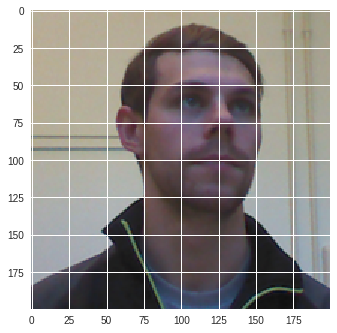

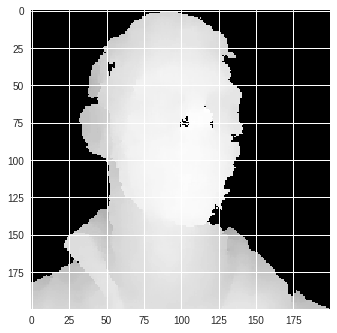

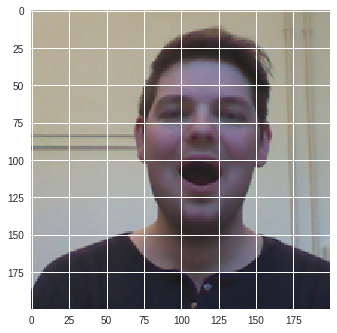

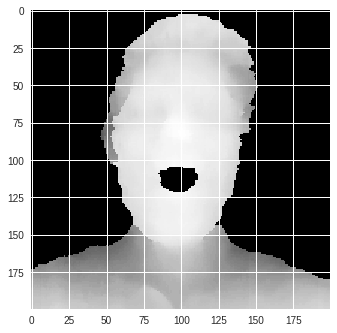

(200, 200, 4)

In [22]:
create_wrong_rgbd("faceid_val/")[0].shape

# Network Crafting

In [0]:
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Dropout, Lambda, ELU, concatenate, GlobalAveragePooling2D, Input, BatchNormalization, SeparableConv2D, Subtract
from keras.activations import relu, softmax
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.optimizers import Adam, RMSprop, SGD
from keras.regularizers import l2
from keras import backend as K

In [0]:
def euclidean_distance(inputs):
  assert len(inputs)==2, \
    'Euclidean distance needs 2 inputs. %d given' % len(inputs)
  u, v = inputs
  return K.sqrt(K.sum(K.square(u - v)))

def contrastive_loss(y_true, y_pred):
  margin=1.
  return K.mean((1. - y_true) * K.square(y_pred) + y_true * K.square(K.maximum(margin - y_pred, 0.)))

In [0]:
def fire(x, squeeze = 16, expand = 64):
  x = Convolution2D(squeeze, (1,1), padding='valid')(x)
  x = Activation('relu')(x)
  
  left = Convolution2D(expand, (1,1), padding='valid')(x)
  left = Activation('relu')(left)
  
  right = Convolution2D(expand, (3,3), padding='same')(x)
  right = Activation('relu')(right)
  
  x = concatenate([left, right], axis=3)
  return x

In [30]:
img_input = Input(shape=(200,200,4))

x = Convolution2D(64, (5,5), strides=(2,2), padding='valid')(img_input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(3,3), strides=(2,2))(x)

x = fire(x, squeeze=16, expand=16)

x = fire(x, squeeze=16, expand=16)

x = MaxPooling2D(pool_size=(3,3), strides=(2,2))(x)

x = fire(x, squeeze=32, expand=32)

x = fire(x, squeeze=32, expand=32)

x = MaxPooling2D(pool_size=(3,3), strides=(2,2))(x)

x = fire(x, squeeze=48, expand=48)

x = fire(x, squeeze=48, expand=48)

x = fire(x, squeeze=64, expand=64)

x = Dropout(0.2)(x)

x = Convolution2D(512, (1,1), padding='same')(x)
out = Activation('relu')(x)

modelsqueeze = Model(img_input, out)

modelsqueeze.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 200, 200, 4)  0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 98, 98, 64)   6464        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, 98, 98, 64)   256         conv2d_3[0][0]                   
__________________________________________________________________________________________________
activation_3 (Activation)       (None, 98, 98, 64)   0           batch_normalization_2[0][0]      
__________________________________________________________________________________________________
max_poolin

In [34]:
im_in = Input(shape=(200,200,4))
#wrong = Input(shape=(200,200,3))

x1 = modelsqueeze(im_in)
#x = Convolution2D(64, (5, 5), padding='valid', strides =(2,2))(x)

#x1 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x1)

"""
x1 = Convolution2D(256, (3,3), padding='valid', activation="relu")(x1)
x1 = Dropout(0.4)(x1)

x1 = MaxPooling2D(pool_size=(3, 3), strides=(1, 1))(x1)

x1 = Convolution2D(256, (3,3), padding='valid', activation="relu")(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0.4)(x1)

x1 = Convolution2D(64, (1,1), padding='same', activation="relu")(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0.4)(x1)
"""



x1 = Flatten()(x1)

x1 = Dense(512, activation="relu")(x1)
x1 = Dropout(0.2)(x1)
#x1 = BatchNormalization()(x1)
feat_x = Dense(128, activation="linear")(x1)
feat_x = Lambda(lambda  x: K.l2_normalize(x,axis=1))(feat_x)


model_top = Model(inputs = [im_in], outputs = feat_x)

model_top.summary()

im_in1 = Input(shape=(200,200,4))
im_in2 = Input(shape=(200,200,4))

feat_x1 = model_top(im_in1)
feat_x2 = model_top(im_in2)


lambda_merge = Lambda(euclidean_distance)([feat_x1, feat_x2])


model_final = Model(inputs = [im_in1, im_in2], outputs = lambda_merge)

model_final.summary()

adam = Adam(lr=0.001)

sgd = SGD(lr=0.001, momentum=0.9)

model_final.compile(optimizer=adam, loss=contrastive_loss)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 200, 200, 4)       0         
_________________________________________________________________
model_1 (Model)              (None, 11, 11, 512)       204608    
_________________________________________________________________
flatten_3 (Flatten)          (None, 61952)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               31719936  
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
lambda_3 (Lambda)            (None, 128)               0         
Total para